In [1]:
import pandas as pd
import numpy as np
import statistics 
import random

df = pd.read_excel('行政管理实务.xlsx', '学习行为数据')
rf = pd.read_excel('行政管理实务.xlsx', '学习成就')
df = df.fillna(0)
rf = rf.fillna(0)

In [2]:
df.shape

(152762, 8)

In [3]:
#df = df[df['访问时长'] > 0]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in df.columns if df[c].dtype in numerics]:
    df[c] = df[c].abs()

In [4]:
df.shape

(152762, 8)

In [5]:
user = df['studentid'].unique()
user = list(user)
len(user)

3400

In [6]:
user2 = rf['学号'].unique()
user2 = list(user2)
len(user2)

3077

In [7]:
activities = df['活动名称'].unique()
activities = list(activities)
len(activities)

54

In [8]:

c1 = 8

c2 = 6

c3 = 1


c4 = ['行政管理专业介绍视频',
 '问卷星的使用.mp4',
 '06-1对物的管理',
 '01-1行政工艺与实务概述',
 '01-2行政工艺与实务类型',
 '02行政程序',
 '06-2对人的管理',
 '06-3对关系的管理',
 '06-4对空间的管理',
 '06-5办公环境的布置',
 '04-1行政调研统计与分析的含义及基本方法',
 '04-2行政调研方案',
 '04-3常用行政调研的方法 观察法、问卷调查法',
 '04-4常用行政调研的方法 访问法和态度量表法',
 '05-1行政管理控制',
 '05-3质量管理',
 '05-4六西格玛管理',
 '07-1行政采购',
 '07-2行政采购的职业道德',
 '08-行政日常工作',
 '09-1行政接待的概念、原则和要求',
 '09-2行政人员个人礼仪',
 '10-会议管理',
 '11-1文书处理',
 '11-2文书管理',
 '11-3文档一体化',
 '12-2信访工作',
 '12-1行政督察',
 '危机管理平台指南视频-学生版.flv',
 '危机管理平台指南视频-火灾应急响应-学生版.flv']

c5 = ['【实务操作】办公室布局设计',
     '【实务操作】办公用品的采购',
     '【实务操作】行政接待',
     '【实务操作】行政人员的个人仪容仪表',
     '20190512行政管理实务期末复习提要.doc',
     '3行政工作量化管理.ppt',
     '点击进入，选择“危机管理”模块',
     '导学.ppt',
     '危机管理平台操作手册-卫生检疫.pdf',
     '危机管理平台操作手册-行邮监管.pdf',
     '危机管理平台操作手册-火灾应急响应.pdf',
     '危机管理平台操作手册-地震应急响应.pdf',
     '学习规则.docx']

c6 = ['微信扫码加关注',
 '专家导学1-为什么要学习行政管理实务这门课程？',
 '专家导学2-行政管理实务是一门怎样的课程？',
 '专家导学3-如何学好行政管理实务？',
 '点击进入',
 '点击进入各章案例',
 '行政文员介绍',
 '主持教师导学',
 '【实务操作】 办公设备模拟操作',
 '进入问卷星']

In [9]:
a1 = df.reindex(columns=['访问时长'])
a2 = list(a1.values)

import random

random.seed(123)
random.uniform(0, 1)

a = []
for i in a2:
    a3 = i * random.uniform(0, 1)
    a.append(a3)

In [10]:
df['高过门槛时长'] = a

In [11]:
df = df.reindex(columns = ['studentid', '活动名称', '访问时长', '高过门槛时长'])

In [12]:
commonalities = set(user) - (set(user) - set(user2))
commonalities = list(commonalities)

In [13]:
len(commonalities)

3077

In [14]:
USER_ID = {}
for i in commonalities:
     USER_ID[i] = df.loc[df['studentid'] == i]

In [15]:
rf.set_index('学号', inplace=True)
rf = rf.loc[commonalities, :]

In [16]:
import scipy.stats as ss

C4_dictionary = {}
duplicate = {'访问时长':'sum', '高过门槛时长':'sum'}

for k , i in zip(range(3077), commonalities): 
    C4_dictionary["LEARNER{0}".format(i)] = []
    
    USER_ID[i] = USER_ID[i].groupby('活动名称').agg(duplicate).reindex(columns=['访问时长', '高过门槛时长'])
    
    
    Time_V = USER_ID[i].reindex(c4, columns =['访问时长']).values    #视频观看时长
    Time_V = np.nan_to_num(Time_V)
    
    Time_T = USER_ID[i].reindex(c5, columns =['访问时长']).values    #文本阅读时长
    Time_T = np.nan_to_num(Time_T)

    Time_H = USER_ID[i].reindex(c6, columns =['访问时长']).values    #作业花费时长
    Time_H = np.nan_to_num(Time_H)

    
    Grit_V = Time_V / c1  #视频观看时长/视频总时长
    Grit_T = Time_T / c2   #文本阅读时长/文本页数
    Grit_H = Time_H / c3   #作业花费时长/作业问题数
    Grit1 = ss.tmean(Grit_V)    #(视频观看时长/视频总时长)的平均
    Grit2 = np.median(Grit_V)    #(视频观看时长/视频总时长)的中位数
    Grit3 = 1/ss.tstd(Grit_V)    #(视频观看时长/视频总时长)的标准差的倒数
    Grit4 = 1/(max(Grit_V)-min(Grit_V))    #(视频观看时长/视频总时长)最大差距的倒数
    Grit5 = ss.tmean(Grit_T)    #(文本阅读时长/文本页数)的平均
    Grit6 = np.median(Grit_T)    #(文本阅读时长/文本页数)的中位数
    Grit7 = 1/ss.tstd(Grit_T)    #(文本阅读时长/文本页数)的标准差的倒数
    Grit8 = 1/(max(Grit_T)-min(Grit_T))    #(文本阅读时长/文本页数)最大差距的倒数
    Grit9 = ss.tmean(Grit_H)    #(作业花费时长/作业问题数)的平均
    Grit10 = np.median(Grit_H)    #(作业花费时长/作业问题数)的中位数
    Grit11 = 1/ss.tstd(Grit_H)    #(作业花费时长/作业问题数)的标准差的倒数
    Grit12 = 1/(max(Grit_H)-min(Grit_H))    #(作业花费时长/作业问题数)最大差距的倒数

    Self_control1 = Time_V[1] / 61    #("最长视频"观看时长/视频总时长)
    Self_control2 = Time_T[0] / 22    #("最多页文本"阅读时长/文本页数)
    Self_control3 = Time_H[0] / 17    #("最多题作业"花费时长/作业问题数)

    Self_control4 = USER_ID[i].reindex(columns =['访问时长']).values    #单一课件一次学习最长时长
    Self_control4 = np.nan_to_num(Self_control4)
    Self_control4 = Self_control4.max()

    Self_control5 = USER_ID[i].reindex(columns = ['访问时长']).values    #单一课件一次学习最短时长 
    Self_control5 = np.nan_to_num(Self_control5)
    Self_control5 = Self_control5.min()

    Self_control6 = USER_ID[i].reindex(columns = ['访问时长']).values    #平均登入時長
    Self_control6 = np.nan_to_num(Self_control6)
    Self_control6 = Self_control6.sum() 
    LOGIN = random.uniform(50, 100)
    Self_control6 = Self_control6 / LOGIN

    Self_control7 = USER_ID[i].reindex(columns =['访问时长']).values    #课程后半段学习时间
    Self_control7 = np.nan_to_num(Self_control7)
    Self_control7 = Self_control7[14:].mean()

    Engagement_V = Time_V    #视频观看时长
    Engagement_T = Time_T    #文本阅读时长
    Engagement_H = Time_H    #作业花费时长

    Engagement1 = USER_ID[i].reindex(columns =['访问时长'])    #学习总时长
    Engagement1 = np.nan_to_num(Engagement1).sum()
    Engagement2 = ss.tmean(Engagement_V)    #平均每次花费在视频学习的时间
    Engagement3 = ss.tmean(Engagement_T)    #平均每次花费在文本课件的时间
    Engagement4 = ss.tmean(Engagement_H)    #平均每次花费在作业答题的时间
    Engagement5 = rf.iloc[k, 1]    #学习次数(登入次数)
    Engagement6 = rf.iloc[k, 2]    #结业考试成绩(30%)*

    Metacognitive_Self_regulation1 = Time_T[1]    #"课程回顾"花费时间
    Metacognitive_Self_regulation2 = random.randint(0, 1)    #是否重复阅读与观看 or 是否按照课程结构

    Self_perception1 = USER_ID[i].reindex(columns =['访问时长']).values
    Self_perception1 = np.nan_to_num(Self_perception1)

    Self_perception1 = 1/((Self_perception1[:14].sum() 
                         - Self_perception1[14:].sum())**2)    
    #(学习历程前半段时长-学习历程后半段时长)的平方的倒数
    
    Self_perception2 = 1/((ss.tmean(Grit_V[:10]) 
                         - ss.tmean(Grit_V[10:]))**2)    
    #((视频观看时长/视频时长)前半段平均-(视频观看时长/视频时长)后半段平均)的平方的倒数
    
    Self_perception3 = 1/((Grit_T[0] - Grit_T[1])**2)    
    #((文本阅读时长/页数)前半段平均-(文本阅读时长/页数)后半段平均)的平方的倒数    
    
    Self_perception4 = 1/((Grit_H[0] - Grit_H[1])**2)    
    #((作业花费时长/页数)前半段平均-(作业花费时长/页数)后半段平均)的平方的倒数 


    Motivation1 = USER_ID[i].reindex(columns =['高过门槛时长']).values
    Motivation1 = np.nan_to_num(Motivation1).sum()    #高过门槛时长总和

    Motivation2 = USER_ID[i].reindex(c4, columns =['高过门槛时长']).values
    Motivation2 = np.nan_to_num(Motivation2).sum()

    Motivation3 = USER_ID[i].reindex(c5, columns =['高过门槛时长']).values   
    Motivation3 = np.nan_to_num(Motivation3).sum()
                                       
    Motivation4 = np.array(USER_ID[i].reindex(c4, columns =['高过门槛时长']).values).flatten()
    Motivation4 = np.nan_to_num(Motivation4)
    Motivation4 = ss.tmean(Motivation4 / c1)

    Motivation5 = np.array(USER_ID[i].reindex(c5, columns =['高过门槛时长']).values).flatten()
    Motivation5 = np.nan_to_num(Motivation5)
    Motivation5 = ss.tmean(Motivation5 / c2)

    Motivation6 = random.randint(50, 100)

    Motivation7 = Motivation6 / (3+1)
    Motivation8 = Motivation7/Motivation5    #(选修花费/页数)的平均 / (文挡高过门槛时长/页数)的平均
    Motivation9 = rf.iloc[k, 3]    #完成进度*
    
    C4_dictionary["LEARNER{0}".format(i)].append([Grit1, 
                                             Grit2,
                                             Grit3,
                                             Grit4,
                                             Grit5,
                                             Grit6,
                                             Grit7,
                                             Grit8,
                                             Grit9,
                                             Grit10,
                                             Grit11,
                                             Grit12,
                                             Self_control1,
                                             Self_control2,
                                             Self_control3,
                                             Self_control4,
                                             Self_control5,
                                             Self_control6,
                                             Self_control7,
                                             Engagement1,
                                             Engagement2,
                                             Engagement3,
                                             Engagement4,
                                             Engagement5,
                                             Engagement6,
                                             Metacognitive_Self_regulation1,
                                             Metacognitive_Self_regulation2,
                                             Self_perception1,
                                             Self_perception2,
                                             Self_perception3,
                                             Self_perception4,
                                             Motivation1,
                                             Motivation2,
                                             Motivation3,
                                             Motivation4,
                                             Motivation5,
                                             Motivation6,
                                             Motivation7,
                                             Motivation8,
                                             Motivation9])


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: divide by z

In [17]:
C4_dictionary.items()

dict_items([('LEARNER20188310340806', [[40.424314067916676, 39.788709993750004, array([0.05045939]), array([0.01512112]), 24.632147850000003, 0.0, array([0.0295229]), array([0.01148141]), 99.52013232, 70.5213801, array([0.0070475]), array([0.00217065]), array([1.8453031]), array([19.45670089]), array([0.32514306]), 529.0613131, 0.0, 213.0192841378583, 215.26840016875002, 12618.344231800003, 323.3945125433334, 147.79288709999997, 99.52013232, 46.5, 0.0, array([413.883411]), 0, 7.44659968739248e-07, 73.0203922669065, array([0.17944449]), array([0.00011672]), 5704.038767373759, 3838.2549916423395, 1083.4209012848783, 15.992729131843081, 13.890011554934338, 74, 18.5, 1.3318923405379022, 57]]), ('LEARNER20188310110231', [[32.032015152916664, 20.3343298375, array([0.03054414]), array([0.00881381]), 19.50777351923077, 1.7104867833333335, array([0.02002219]), array([0.0055725]), 107.57728540000002, 13.74879245, array([0.00744379]), array([0.00294548]), array([0.20310018]), array([0.4664964]), 

In [18]:
column_names = ['G1', 
                'G2', 
                'G3', 
                'G4', 
                'G5', 
                'G6', 
                'G7', 
                'G8', 
                'G9', 
                'G10', 
                'G11', 
                'G12', 
                'SC1', 
                'SC2', 
                'SC3', 
                'SC4', 
                'SC5', 
                'SC6', 
                'SC7', 
                'E1', 
                'E2', 
                'E3', 
                'E4', 
                'E5', 
                'E6', 
                'MSR1', 
                'MSR2', 
                'SP1', 
                'SP2', 
                'SP3', 
                'SP4', 
                'M1', 
                'M2', 
                'M3', 
                'M4', 
                'M5',
                'M6', 
                'M7', 
                'M8', 
                'M9']


df_Data_Point = pd.DataFrame(columns = column_names)

In [19]:
len(commonalities)

3077

In [20]:
for i in commonalities:
    a_series = pd.Series(C4_dictionary['LEARNER' + str(i)][0], index = df_Data_Point.columns)
    df_Data_Point = df_Data_Point.append(a_series, ignore_index=True)

In [21]:
pd.set_option('display.max_columns', 88)
pd.set_option('display.max_rows', 22)

df_Data_Point.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,40.424314,39.78871,[0.05045939065156213],[0.015121120750872004],24.632148,0.000000,[0.02952290242777139],[0.011481411379031135],99.520132,70.521380,[0.007047497797416274],[0.0021706522227022272],[1.8453031],[19.45670089090909],[0.3251430647058824],529.061313,0.000000,213.019284,215.268400,12618.344232,323.394513,147.792887,99.520132,46.5,0.0,[413.883411],0,7.446600e-07,73.020392,[0.17944449402002294],[0.00011671950247739977],5704.038767,3838.254992,1083.420901,15.992729,13.890012,74,18.50,1.331892,57
1,32.032015,20.33433,[0.03054414141357286],[0.008813805062869972],19.507774,1.710487,[0.020022186252695875],[0.005572496462320821],107.577285,13.748792,[0.007443789098165267],[0.0029454756365810395],[0.2031001819672131],[0.46649639545454546],[0.532070205882353],1076.716700,0.000000,130.329497,228.863443,10285.062825,256.256121,117.046641,107.577285,41.6,28.4,[302.4303168],1,5.255201e-08,0.001459,[0.00042173437459767357],[2.986118842423862e-05],6917.074666,4965.367923,1226.534019,20.689033,15.724795,93,23.25,1.478557,80
2,0.000000,0.00000,[inf],[inf],0.000000,0.000000,[inf],[inf],0.208095,0.000000,[1.519630640199149],[0.48054940252091416],[0.0],[0.0],[0.12240891176470588],2.080951,2.080951,0.032421,NaN,2.080951,0.000000,0.000000,0.208095,42.1,0.0,[0.0],0,2.309277e-01,inf,[inf],[0.2309277282632076],0.515553,0.000000,0.000000,0.000000,0.000000,68,17.00,inf,43
3,1.356343,0.00000,[0.16126483914313516],[0.029912816020427512],12.419376,0.000000,[0.051324916842919496],[0.022150624160859826],107.511813,1.615122,[0.006850544489323441],[0.003190344833299345],[0.9521069360655737],[12.312396740909092],[8.545920623529412],313.445741,0.000000,35.215648,NaN,2369.351855,10.850747,74.516255,107.511813,50.0,40.0,[259.201147],1,1.781316e-07,0.060397,[0.26426710172445167],[3.5361307131401694e-05],1144.012725,28.914564,619.262371,0.120477,7.939261,89,22.25,2.802528,100
4,1.138728,0.00000,[0.1940841812789839],[0.03584157253093065],5.833511,0.000000,[0.08535760761929492],[0.028830377669442513],135.516518,21.523754,[0.0050554153174228005],[0.0021163716948467423],[3.6590900377049174],[9.459719045454545],[3.7823861529411764],472.506792,6.516432,26.197352,NaN,2083.473698,9.109823,35.001063,135.516518,48.3,28.0,[172.9101717],0,2.303690e-07,0.092162,[0.02904873189970033],[6.9948629464182104e-06],759.370278,23.899220,179.692161,0.099580,2.303746,58,14.50,6.294098,86


In [22]:
df_Data_Point['G3'] = df_Data_Point['G3'].str[0]
df_Data_Point['G4'] = df_Data_Point['G4'].str[0]
df_Data_Point['G7'] = df_Data_Point['G7'].str[0]
df_Data_Point['G8'] = df_Data_Point['G8'].str[0]
df_Data_Point['G11'] = df_Data_Point['G11'].str[0]
df_Data_Point['G12'] = df_Data_Point['G12'].str[0]
df_Data_Point['SC1'] = df_Data_Point['SC1'].str[0]
df_Data_Point['SC2'] = df_Data_Point['SC2'].str[0]
df_Data_Point['SC3'] = df_Data_Point['SC3'].str[0]
df_Data_Point['MSR1'] = df_Data_Point['MSR1'].str[0]
df_Data_Point['SP3'] = df_Data_Point['SP3'].str[0]
df_Data_Point['SP4'] = df_Data_Point['SP4'].str[0]

In [23]:
df_Data_Point.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,40.424314,39.78871,0.050459,0.015121,24.632148,0.000000,0.029523,0.011481,99.520132,70.521380,0.007047,0.002171,1.845303,19.456701,0.325143,529.061313,0.000000,213.019284,215.268400,12618.344232,323.394513,147.792887,99.520132,46.5,0.0,413.883411,0,7.446600e-07,73.020392,0.179444,0.000117,5704.038767,3838.254992,1083.420901,15.992729,13.890012,74,18.50,1.331892,57
1,32.032015,20.33433,0.030544,0.008814,19.507774,1.710487,0.020022,0.005572,107.577285,13.748792,0.007444,0.002945,0.203100,0.466496,0.532070,1076.716700,0.000000,130.329497,228.863443,10285.062825,256.256121,117.046641,107.577285,41.6,28.4,302.430317,1,5.255201e-08,0.001459,0.000422,0.000030,6917.074666,4965.367923,1226.534019,20.689033,15.724795,93,23.25,1.478557,80
2,0.000000,0.00000,inf,inf,0.000000,0.000000,inf,inf,0.208095,0.000000,1.519631,0.480549,0.000000,0.000000,0.122409,2.080951,2.080951,0.032421,NaN,2.080951,0.000000,0.000000,0.208095,42.1,0.0,0.000000,0,2.309277e-01,inf,inf,0.230928,0.515553,0.000000,0.000000,0.000000,0.000000,68,17.00,inf,43
3,1.356343,0.00000,0.161265,0.029913,12.419376,0.000000,0.051325,0.022151,107.511813,1.615122,0.006851,0.003190,0.952107,12.312397,8.545921,313.445741,0.000000,35.215648,NaN,2369.351855,10.850747,74.516255,107.511813,50.0,40.0,259.201147,1,1.781316e-07,0.060397,0.264267,0.000035,1144.012725,28.914564,619.262371,0.120477,7.939261,89,22.25,2.802528,100
4,1.138728,0.00000,0.194084,0.035842,5.833511,0.000000,0.085358,0.028830,135.516518,21.523754,0.005055,0.002116,3.659090,9.459719,3.782386,472.506792,6.516432,26.197352,NaN,2083.473698,9.109823,35.001063,135.516518,48.3,28.0,172.910172,0,2.303690e-07,0.092162,0.029049,0.000007,759.370278,23.899220,179.692161,0.099580,2.303746,58,14.50,6.294098,86


In [24]:
df_Data_Point.shape

(3077, 40)

In [25]:
df_Data_Point['USER_ID'] = commonalities
df_Data_Point.set_index('USER_ID', inplace=True)

In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in df_Data_Point.columns if df_Data_Point[c].dtype in numerics]:
    df_Data_Point[c] = df_Data_Point[c].abs()

In [27]:
df_Data_Point = df_Data_Point[~df_Data_Point.isin([np.nan, np.inf]).any(1)].astype(np.float64)

In [28]:
df_Data_Point.shape

(2045, 40)

In [29]:
df_Data_Point.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2.045000e+03,2.045000e+03,2.045000e+03,2.045000e+03,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,34.153154,27.116724,0.216900,0.051260,28.268252,6.907826,0.184405,0.061996,259.579792,147.625354,0.020722,0.007353,7.032250,18.033111,9.750150,1438.788228,10.308244,181.446928,305.372465,12997.478474,273.225231,169.609510,259.579792,44.201858,25.325183,323.163885,0.493888,2.181187e-04,2.653438e+03,3.266261e+03,1.327475e+03,6468.889147,4093.170024,1081.958459,17.054875,13.871262,74.759413,18.689853,14.224066,78.930562
std,34.239276,33.722258,0.555380,0.130184,36.743209,24.183382,1.015524,0.323444,249.608802,184.883171,0.061940,0.021133,10.138201,27.810522,25.493962,1693.376066,40.289972,173.197212,287.504275,11698.034138,273.914205,220.459257,249.608802,10.725432,15.868766,521.705242,0.500085,8.782348e-03,1.012455e+05,1.148798e+05,5.804187e+04,5927.953417,4188.818640,1479.247014,17.453411,18.964705,14.801750,3.700437,207.711819,23.241817
min,0.025000,0.000000,0.001295,0.000240,0.011433,0.000000,0.000693,0.000192,0.915900,0.000000,0.000105,0.000033,0.000000,0.000000,0.000000,8.456841,0.000000,0.394768,0.000000,30.449920,0.200000,0.068599,0.915900,0.000000,0.000000,0.000000,0.000000,3.478034e-10,1.018833e-05,2.814985e-06,1.059144e-09,10.900299,2.864349,0.171947,0.011935,0.002204,50.000000,12.500000,0.073292,0.000000
25%,6.042179,0.965546,0.022775,0.005126,5.237374,0.000000,0.012833,0.004150,62.442944,24.199217,0.001905,0.000632,1.022883,1.317079,0.578912,413.542172,0.000000,43.172393,85.979509,3556.028209,48.337435,31.424243,62.442944,44.400000,0.000000,22.924274,0.000000,1.806048e-08,2.506578e-03,8.532174e-04,3.303180e-06,1663.284949,663.655164,183.524595,2.765230,2.352879,62.000000,15.500000,0.967361,60.000000
50%,18.388904,7.492616,0.035875,0.009320,14.801560,1.319757,0.040873,0.013077,205.456932,88.068233,0.004145,0.001505,3.619530,4.485577,1.991384,1208.326779,0.000000,120.689337,231.209677,9221.676627,147.111230,88.809363,205.456932,47.400000,31.200000,92.041189,0.000000,8.865039e-08,1.911475e-02,3.754421e-02,8.522463e-06,4498.961232,2140.087846,522.736379,8.917033,6.701748,75.000000,18.750000,2.707077,88.000000
75%,64.563781,58.482202,0.204886,0.044199,37.204884,4.737827,0.131418,0.061820,379.690231,199.437804,0.017900,0.006687,7.474087,23.974849,5.167930,1861.755216,0.000000,288.996315,474.571525,21890.436507,516.510249,223.229303,379.690231,49.400000,39.200000,386.577773,1.000000,7.623864e-07,3.911662e-01,1.127253e+00,5.289332e-04,10571.212501,7596.870696,1461.211213,31.653628,18.733477,88.000000,22.000000,8.141439,97.000000
max,290.690631,179.476156,9.955973,2.725566,401.449195,306.835015,42.482879,13.416717,3727.201125,2203.555466,1.061500,0.411767,103.172300,342.824391,363.731808,33362.000000,591.551713,1270.782595,3183.203403,86488.990115,2325.525051,2408.695169,3727.201125,50.000000,40.000000,5400.000000,1.000000,3.967800e-01,4.559192e+06,5.159425e+06,2.624264e+06,46954.275498,44583.594851,21018.616418,185.764979,269.469441,100.000000,25.000000,8959.164645,100.000000


In [30]:
# Normalization of Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
df_Data_Point_scaled = scaler.fit_transform(df_Data_Point) # it becomes an array
df_Data_Point_scaled_noNaN = np.nan_to_num(df_Data_Point_scaled)

# make it a dataframe
df_Data_Point_scaled_noNaN = pd.DataFrame(df_Data_Point_scaled_noNaN, index = df_Data_Point.index, 
                                          columns = df_Data_Point.columns)

In [31]:
df_Data_Point_scaled_noNaN

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20188310340806,0.138989,0.221694,0.004939,0.005460,0.061331,0.000000,0.000679,0.000841,0.026462,0.032003,0.006541,0.005193,0.017886,0.056754,0.000894,0.015609,0.0,0.167370,0.067626,0.145595,0.138989,0.061331,0.026462,0.930,0.00,0.076645,0.0,1.875881e-06,1.601608e-05,3.477940e-08,4.447665e-11,0.121277,0.086032,0.051538,0.086032,0.051538,0.48,0.48,0.000140,0.57
20188310110231,0.110116,0.113298,0.002938,0.003146,0.048566,0.005575,0.000455,0.000401,0.028624,0.006239,0.006914,0.007075,0.001969,0.001361,0.001463,0.032028,0.0,0.102280,0.071897,0.118607,0.110116,0.048566,0.028624,0.832,0.71,0.056006,1.0,1.315697e-07,3.178304e-10,8.119498e-11,1.137848e-11,0.147117,0.111315,0.058347,0.111315,0.058347,0.86,0.86,0.000157,0.80
20188310110236,0.002556,0.004234,0.222331,0.179604,0.000745,0.000000,0.054207,0.069509,0.001368,0.003044,0.419193,0.328182,0.000661,0.000853,0.001157,0.000236,0.0,0.002256,0.001765,0.002755,0.002556,0.000745,0.001368,0.942,0.76,0.000757,0.0,5.388906e-04,5.776497e-06,1.268250e-06,2.829584e-08,0.002124,0.001687,0.000202,0.001687,0.000202,0.24,0.24,0.030522,0.88
20188310110237,0.099529,0.220195,0.004399,0.005426,0.002782,0.000000,0.014112,0.013740,0.021040,0.001078,0.005941,0.005497,0.035643,0.001362,0.001180,0.015709,0.0,0.109179,0.057717,0.090215,0.099529,0.002782,0.021040,0.986,1.00,0.000707,0.0,2.463039e-07,2.807740e-09,1.676187e-07,2.076706e-12,0.090709,0.084686,0.002225,0.084686,0.002225,0.46,0.46,0.003378,0.99
20188310110238,0.105617,0.140218,0.004493,0.003438,0.003789,0.000000,0.010024,0.011019,0.063292,0.037032,0.003080,0.003114,0.047811,0.001404,0.002264,0.024707,0.0,0.088697,0.056983,0.113702,0.105617,0.003789,0.063292,1.000,1.00,0.000970,0.0,1.312547e-06,3.714162e-09,2.436690e-07,6.830538e-13,0.095433,0.071105,0.003280,0.071105,0.003280,0.72,0.72,0.002700,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20188310060387,0.122499,0.000000,0.001871,0.001954,0.027740,0.000000,0.001075,0.001048,0.036412,0.002695,0.004033,0.003740,0.035121,0.055837,0.002099,0.042837,0.0,0.096336,0.063384,0.124412,0.122499,0.027740,0.036412,1.000,0.92,0.029240,1.0,7.044334e-08,1.507775e-09,1.001520e-10,2.880521e-12,0.107665,0.098787,0.016655,0.098787,0.016655,0.12,0.12,0.000340,0.97
20188310340791,0.187037,0.000000,0.000599,0.000456,0.238409,0.016455,0.000174,0.000284,0.209002,0.245704,0.001010,0.001211,0.279796,0.196548,0.245047,0.161648,0.0,0.246640,0.191081,0.327167,0.187037,0.238409,0.209002,0.992,0.00,0.273148,1.0,6.420280e-09,5.129025e-10,1.278476e-07,2.808708e-12,0.266491,0.128150,0.147938,0.128150,0.147938,0.04,0.04,0.000028,0.50
20188310110162,0.013914,0.006228,0.008438,0.006472,0.016236,0.004242,0.001784,0.001632,0.061263,0.023531,0.003011,0.003097,0.045618,0.036016,0.009101,0.022674,0.0,0.031765,0.030116,0.043344,0.013914,0.016236,0.061263,1.000,0.94,0.024995,0.0,2.039480e-07,2.580399e-09,3.730350e-10,7.588599e-13,0.042280,0.011142,0.007450,0.011142,0.007450,0.02,0.02,0.000700,0.98


In [32]:
df_Data_Point_scaled_noNaN.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2.045000e+03,2.045000e+03,2.045000e+03,2.045000e+03,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,0.117414,0.151088,0.021659,0.018721,0.070389,0.022513,0.004324,0.004607,0.069416,0.066994,0.019425,0.017780,0.068160,0.052602,0.026806,0.042884,0.017426,0.142517,0.095932,0.149980,0.117414,0.070389,0.069416,0.884037,0.633130,0.059845,0.493888,5.497211e-04,5.819973e-04,6.330670e-04,5.058466e-04,0.137570,0.091751,0.051468,0.091751,0.051468,0.495188,0.495188,0.001579,0.789306
std,0.117796,0.187893,0.055791,0.047768,0.091529,0.078816,0.023905,0.024108,0.066986,0.083902,0.058357,0.051328,0.098265,0.081122,0.070090,0.050771,0.068109,0.136334,0.090319,0.135302,0.117796,0.091529,0.066986,0.214509,0.396719,0.096612,0.500085,2.213405e-02,2.220689e-02,2.226601e-02,2.211739e-02,0.126279,0.093960,0.070379,0.093960,0.070379,0.296035,0.296035,0.023184,0.232418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020701,0.005380,0.002158,0.001793,0.013018,0.000000,0.000286,0.000295,0.016512,0.010982,0.001696,0.001455,0.009914,0.003842,0.001592,0.012145,0.000000,0.033673,0.027010,0.040778,0.020701,0.013018,0.016512,0.888000,0.000000,0.004245,0.000000,4.464106e-08,5.475509e-10,1.648250e-10,1.258304e-12,0.035200,0.014822,0.008723,0.014822,0.008723,0.240000,0.240000,0.000100,0.600000
50%,0.063179,0.041747,0.003474,0.003332,0.036843,0.004301,0.000946,0.000960,0.054891,0.039966,0.003806,0.003576,0.035082,0.013084,0.005475,0.035974,0.000000,0.094691,0.072634,0.106308,0.063179,0.036843,0.054891,0.948000,0.780000,0.017045,0.000000,2.225480e-07,4.190340e-09,7.276275e-09,3.247160e-12,0.095606,0.047941,0.024862,0.047941,0.024862,0.500000,0.500000,0.000294,0.880000
75%,0.222038,0.325849,0.020452,0.016130,0.092651,0.015441,0.003077,0.004593,0.101649,0.090507,0.016766,0.016161,0.072443,0.069933,0.014208,0.055565,0.000000,0.227176,0.149086,0.252838,0.222038,0.092651,0.101649,0.988000,0.980000,0.071588,1.000000,1.920557e-06,8.579502e-08,2.184837e-07,2.015545e-10,0.224959,0.170343,0.069512,0.170343,0.069512,0.760000,0.760000,0.000901,0.970000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

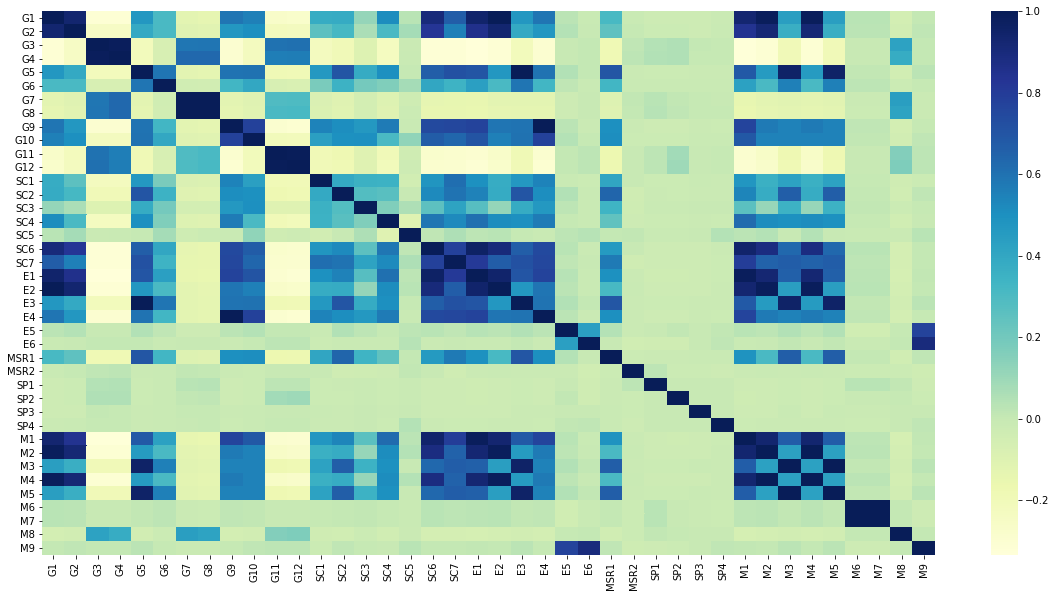

In [33]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
e = df_Data_Point_scaled_noNaN.corr()
sns.heatmap(e, cmap="YlGnBu")

In [34]:
from __future__ import print_function
import sys
import numpy
numpy.set_printoptions(linewidth=1000)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Do the PCA.

n=5
pca = PCA(n_components=n)
pct = pca.fit_transform(df_Data_Point_scaled_noNaN)

# Append the principle components for each entry to the dataframe
for i in range(n):
    df_Data_Point_scaled_noNaN['PC' + str(i + 1)] = pct[:, i]

display(df_Data_Point_scaled_noNaN.head())

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,SC1,SC2,SC3,SC4,SC5,SC6,SC7,E1,E2,E3,E4,E5,E6,MSR1,MSR2,SP1,SP2,SP3,SP4,M1,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,PC3,PC4,PC5
USER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20188310340806,0.138989,0.221694,0.004939,0.005460,0.061331,0.000000,0.000679,0.000841,0.026462,0.032003,0.006541,0.005193,0.017886,0.056754,0.000894,0.015609,0.0,0.167370,0.067626,0.145595,0.138989,0.061331,0.026462,0.930,0.00,0.076645,0.0,1.875881e-06,1.601608e-05,3.477940e-08,4.447665e-11,0.121277,0.086032,0.051538,0.086032,0.051538,0.48,0.48,0.000140,0.57,-0.336174,0.704239,-0.114257,0.030290,-0.263479
20188310110231,0.110116,0.113298,0.002938,0.003146,0.048566,0.005575,0.000455,0.000401,0.028624,0.006239,0.006914,0.007075,0.001969,0.001361,0.001463,0.032028,0.0,0.102280,0.071897,0.118607,0.110116,0.048566,0.028624,0.832,0.71,0.056006,1.0,1.315697e-07,3.178304e-10,8.119498e-11,1.137848e-11,0.147117,0.111315,0.058347,0.111315,0.058347,0.86,0.86,0.000157,0.80,0.459110,-0.109719,0.526213,-0.183286,0.068620
20188310110236,0.002556,0.004234,0.222331,0.179604,0.000745,0.000000,0.054207,0.069509,0.001368,0.003044,0.419193,0.328182,0.000661,0.000853,0.001157,0.000236,0.0,0.002256,0.001765,0.002755,0.002556,0.000745,0.001368,0.942,0.76,0.000757,0.0,5.388906e-04,5.776497e-06,1.268250e-06,2.829584e-08,0.002124,0.001687,0.000202,0.001687,0.000202,0.24,0.24,0.030522,0.88,-0.489446,-0.094104,-0.467559,-0.382844,-0.027266
20188310110237,0.099529,0.220195,0.004399,0.005426,0.002782,0.000000,0.014112,0.013740,0.021040,0.001078,0.005941,0.005497,0.035643,0.001362,0.001180,0.015709,0.0,0.109179,0.057717,0.090215,0.099529,0.002782,0.021040,0.986,1.00,0.000707,0.0,2.463039e-07,2.807740e-09,1.676187e-07,2.076706e-12,0.090709,0.084686,0.002225,0.084686,0.002225,0.46,0.46,0.003378,0.99,-0.571509,-0.311987,-0.066775,-0.116998,0.030167
20188310110238,0.105617,0.140218,0.004493,0.003438,0.003789,0.000000,0.010024,0.011019,0.063292,0.037032,0.003080,0.003114,0.047811,0.001404,0.002264,0.024707,0.0,0.088697,0.056983,0.113702,0.105617,0.003789,0.063292,1.000,1.00,0.000970,0.0,1.312547e-06,3.714162e-09,2.436690e-07,6.830538e-13,0.095433,0.071105,0.003280,0.071105,0.003280,0.72,0.72,0.002700,1.00,-0.589760,-0.280769,0.286920,-0.209131,0.004742


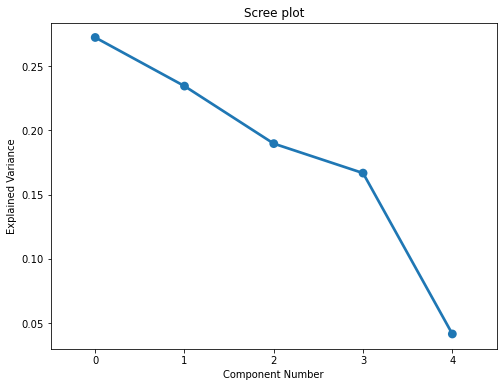

In [35]:
# Do a scree plot
ind = np.arange(n)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [36]:
check_loadings_pca = pca.components_
check_eigenValues_pca = pca.explained_variance_ratio_
df_Data_Point_scaled_noNaN_check_pca = df_Data_Point_scaled_noNaN.reindex(columns=column_names)

In [37]:
num_pc = 5
check_pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
check_loadings_df = pd.DataFrame.from_dict(dict(zip(check_pc_list, check_loadings_pca)))
check_loadings_df['variable'] = df_Data_Point_scaled_noNaN_check_pca.columns.values
check_loadings_df = check_loadings_df.set_index('variable')

In [38]:
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 88)

check_loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
G1,-0.007027,0.002971,0.062075,0.274951,0.025610
G2,-0.005785,-0.000148,0.092303,0.408835,0.027433
G3,0.002669,-0.001540,-0.009112,-0.047346,-0.005085
G4,0.002761,-0.001563,-0.007539,-0.040495,-0.003808
G5,-0.006488,-0.001860,0.032720,0.159616,-0.021282
G6,-0.002850,0.001870,0.021181,0.086419,-0.008749
G7,0.000786,0.000154,-0.002475,-0.008791,0.001683
G8,0.000765,0.000201,-0.002779,-0.009321,0.002026
G9,-0.004022,0.001978,0.026264,0.123785,-0.002440


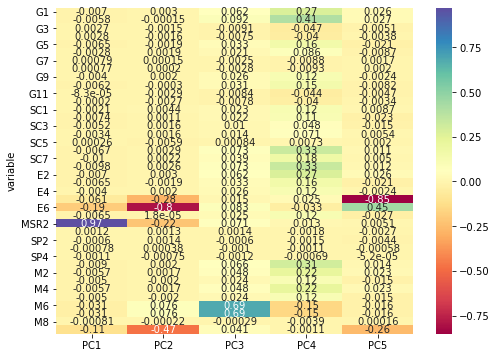

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(check_loadings_df, annot=True, cmap='Spectral')
plt.show()

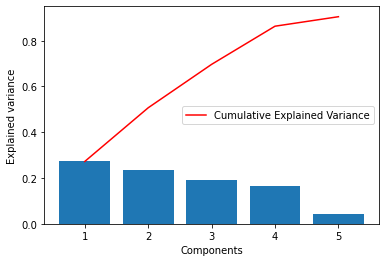

In [40]:
plt.bar(range(1, len(check_eigenValues_pca)+1), check_eigenValues_pca)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(check_eigenValues_pca)+1),
         np.cumsum(check_eigenValues_pca),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='center right')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


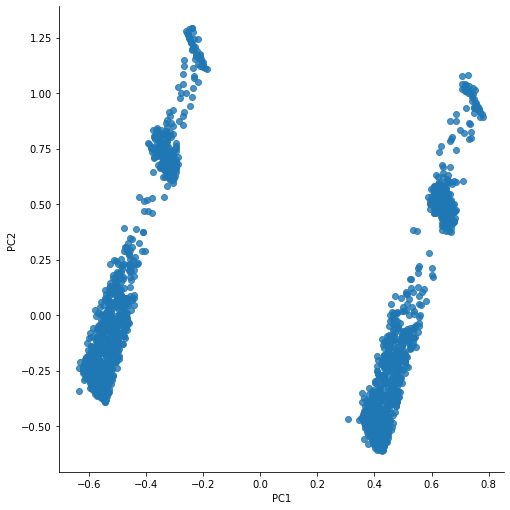

In [41]:
g = sns.lmplot('PC1',
               'PC2',
               data=df_Data_Point_scaled_noNaN,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

In [42]:
df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.drop(columns =['PC4', 'PC5']) 

In [43]:
df_Data_Point_scaled_noNaN_0 = df_Data_Point_scaled_noNaN.drop(columns =['PC1', 'PC2', 'PC3'], inplace = False) 
df_Data_Point_scaled_noNaN_0.head()
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,M2,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,PC3
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
20188310340806,0.138989,0.221694,0.004939,0.005460,0.061331,0.000000,0.000679,0.000841,0.026462,0.032003,0.006541,...,0.086032,0.051538,0.086032,0.051538,0.48,0.48,0.000140,0.57,-0.336174,0.704239,-0.114257
20188310110231,0.110116,0.113298,0.002938,0.003146,0.048566,0.005575,0.000455,0.000401,0.028624,0.006239,0.006914,...,0.111315,0.058347,0.111315,0.058347,0.86,0.86,0.000157,0.80,0.459110,-0.109719,0.526213
20188310110236,0.002556,0.004234,0.222331,0.179604,0.000745,0.000000,0.054207,0.069509,0.001368,0.003044,0.419193,...,0.001687,0.000202,0.001687,0.000202,0.24,0.24,0.030522,0.88,-0.489446,-0.094104,-0.467559
20188310110237,0.099529,0.220195,0.004399,0.005426,0.002782,0.000000,0.014112,0.013740,0.021040,0.001078,0.005941,...,0.084686,0.002225,0.084686,0.002225,0.46,0.46,0.003378,0.99,-0.571509,-0.311987,-0.066775
20188310110238,0.105617,0.140218,0.004493,0.003438,0.003789,0.000000,0.010024,0.011019,0.063292,0.037032,0.003080,...,0.071105,0.003280,0.071105,0.003280,0.72,0.72,0.002700,1.00,-0.589760,-0.280769,0.286920


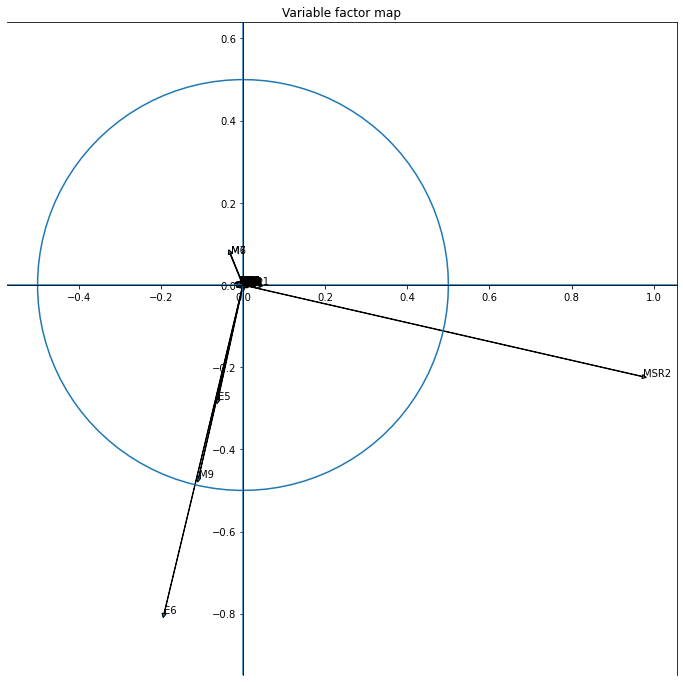

In [44]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.01,
             head_length=0.01)
    plt.text(pca.components_[0, i] + 0.001,
             pca.components_[1, i] + 0.001,
             df_Data_Point_scaled_noNaN_0.columns[i])                   

# Name of columns = Name of features

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(0.5 * np.cos(an), 0.5 * np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.show()

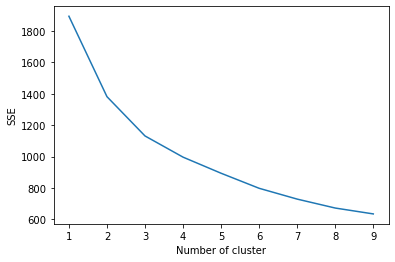

In [45]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_Data_Point_scaled_noNaN_0)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [46]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib

df_Data_Point_scaled_noNaN_2 = df_Data_Point_scaled_noNaN[['PC1','PC2','PC3']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_Data_Point_scaled_noNaN_2)
y_kmeans = kmeans.predict(df_Data_Point_scaled_noNaN_2)
c = y_kmeans.astype('float32')
x = df_Data_Point_scaled_noNaN_2['PC1'].astype('float32')
y = df_Data_Point_scaled_noNaN_2['PC2'].astype('float32')
z = df_Data_Point_scaled_noNaN_2['PC3'].astype('float32')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=12, azim=40)              # elevation and angle
ax.dist=10                                 # distance
ax.scatter(
       x, y, z,  # data
       c=c,                            # marker colour
       #marker='o',                   # marker shape
       s=60,                         # marker size
       cmap='viridis'
       )

plt.show()

Using matplotlib backend: Qt5Agg


In [47]:
centers = kmeans.cluster_centers_
centers

array([[-0.54099134, -0.14033036,  0.00856829],
       [ 0.43657426, -0.35468218,  0.0382539 ],
       [ 0.18980685,  0.70238343, -0.06605377]])

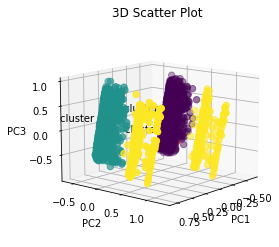

In [67]:
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''
    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)


    
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=12, azim=40)              # elevation and angle
ax.dist=10                                 # distance
ax.scatter(
       x, y, z,  # data
       c=c,                            # marker colour
       #marker='o',                   # marker shape
       s=40,                         # marker size
       cmap='viridis'
       )

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=400, alpha=0.5)
n = ['cluster 1', 'cluster 2', 'cluster 3']
for i, txt in enumerate(n):
    annotate3D(ax, txt, centers[i, :], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')

plt.show()

In [49]:
# Plot a variable factor map for the first three dimensions.
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim(0,2)
for i in range(0, len(df_Data_Point_scaled_noNaN_0.columns)):          # Each PCA's number of features
    ax.arrow3D(0,0,0,
               pca.components_[0, i] * 30, pca.components_[1, i] * 30, pca.components_[2, i] * 30,
               mutation_scale=20,
               arrowstyle="-|>",
               linestyle='dashed')               
    annotate3D(ax, df_Data_Point_scaled_noNaN_0.columns[i], 
               (pca.components_[0, i] * 30 + 0.001,  pca.components_[1, i] * 30 + 0.001, pca.components_[2, i] * 30 + 0.001), 
               fontsize=10, xytext=(-3,3), textcoords='offset points', ha='right',va='bottom')


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=12, azim=40)              # elevation and angle
ax.dist=10                                 # distance
ax.scatter(
       x, y, z,  # data
       c=c,                            # marker colour
       #marker='o',                   # marker shape
       s=40,                         # marker size
       cmap='viridis'
       )

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=400, alpha=0.5)
n = ['cluster 1', 'cluster 2', 'cluster 3']
for i, txt in enumerate(n):
    annotate3D(ax, txt, centers[i, :], fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')

plt.show()

In [50]:
df_Data_Point_scaled_noNaN['cluster'] = y_kmeans
df_Data_Point_scaled_noNaN.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,...,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,PC3,cluster
USER_ID,,,,,,,,,,,,,,,,,,,,,,,
20188310340806,0.138989,0.221694,0.004939,0.005460,0.061331,0.000000,0.000679,0.000841,0.026462,0.032003,0.006541,...,0.051538,0.086032,0.051538,0.48,0.48,0.000140,0.57,-0.336174,0.704239,-0.114257,2
20188310110231,0.110116,0.113298,0.002938,0.003146,0.048566,0.005575,0.000455,0.000401,0.028624,0.006239,0.006914,...,0.058347,0.111315,0.058347,0.86,0.86,0.000157,0.80,0.459110,-0.109719,0.526213,1
20188310110236,0.002556,0.004234,0.222331,0.179604,0.000745,0.000000,0.054207,0.069509,0.001368,0.003044,0.419193,...,0.000202,0.001687,0.000202,0.24,0.24,0.030522,0.88,-0.489446,-0.094104,-0.467559,0
20188310110237,0.099529,0.220195,0.004399,0.005426,0.002782,0.000000,0.014112,0.013740,0.021040,0.001078,0.005941,...,0.002225,0.084686,0.002225,0.46,0.46,0.003378,0.99,-0.571509,-0.311987,-0.066775,0
20188310110238,0.105617,0.140218,0.004493,0.003438,0.003789,0.000000,0.010024,0.011019,0.063292,0.037032,0.003080,...,0.003280,0.071105,0.003280,0.72,0.72,0.002700,1.00,-0.589760,-0.280769,0.286920,0


In [51]:
cluster_1 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 0]
cluster_2 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 1]
cluster_3 = df_Data_Point_scaled_noNaN.loc[df_Data_Point_scaled_noNaN['cluster'] == 2]

In [52]:
mean_cluster_1 = cluster_1.mean() 
mean_cluster_2 = cluster_2.mean() 
mean_cluster_3 = cluster_3.mean() 

In [53]:
list_mean_cluster_1 = mean_cluster_1.tolist() 
list_mean_cluster_2 = mean_cluster_2.tolist() 
list_mean_cluster_3 = mean_cluster_3.tolist()

G = []
SC = []
E = []
MSR = []
SP = []
M = []

for i in range(3):
    XYZ1 = eval('list_mean_cluster_'+str(i+1))
    XYZ1 = XYZ1[:12]
    G.append(statistics.mean(XYZ1))
    XYZ2 = eval('list_mean_cluster_'+str(i+1))
    XYZ2 = XYZ2[12:19]
    SC.append(statistics.mean(XYZ2))
    XYZ3 = eval('list_mean_cluster_'+str(i+1))
    XYZ3 = XYZ3[19:25]
    E.append(statistics.mean(XYZ3))
    XYZ4 = eval('list_mean_cluster_'+str(i+1))
    XYZ4 = XYZ4[25:27]
    MSR.append(statistics.mean(XYZ4))
    XYZ5 = eval('list_mean_cluster_'+str(i+1))
    XYZ5 = XYZ5[27:31]
    SP.append(statistics.mean(XYZ5))
    XYZ6 = eval('list_mean_cluster_'+str(i+1))
    XYZ6 = XYZ6[31:40]
    M.append(statistics.mean(XYZ6))


In [54]:
print(G)
print(SC)
print(E)
print(MSR)
print(SP)
print(M)

[0.04993924213598088, 0.0481024651016056, 0.04767631789981953]
[0.06658470834729384, 0.061536171925606224, 0.06268778373393488]
[0.370797825631457, 0.36289403511079044, 0.18755568193806055]
[0.03132176655450044, 0.5279592478470652, 0.28960799756890865]
[0.0006947314496181414, 0.00012636851262679943, 0.000996473920651324]
[0.2633547214913634, 0.2533112570816996, 0.20629177480030947]


In [55]:
Learners = {}
for i in range(3):
    Learners['Persona'+str(i+1)] = [G[i], SC[i], E[i], MSR[i], SP[i], M[i]]

Learners

{'Persona1': [0.04993924213598088,
  0.06658470834729384,
  0.370797825631457,
  0.03132176655450044,
  0.0006947314496181414,
  0.2633547214913634],
 'Persona2': [0.0481024651016056,
  0.061536171925606224,
  0.36289403511079044,
  0.5279592478470652,
  0.00012636851262679943,
  0.2533112570816996],
 'Persona3': [0.04767631789981953,
  0.06268778373393488,
  0.18755568193806055,
  0.28960799756890865,
  0.000996473920651324,
  0.20629177480030947]}

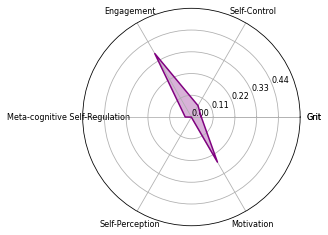

In [56]:
from math import pi
%matplotlib inline 

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles0 = [n / float(N)*2*pi for n in range(N)]

Learners['Persona1'] += Learners['Persona1'][:1]
angles0 += angles0[:1]
categories += categories[:1]

plt.polar(angles0, Learners['Persona1'], 'purple')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona1'], 'purple', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.55)
axes.set_yticks(np.arange(0,0.55,0.11))


plt.show()

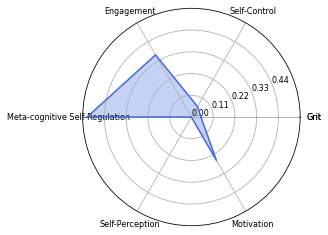

In [57]:
Learners['Persona2'] += Learners['Persona2'][:1]

plt.polar(angles0, Learners['Persona2'], 'royalblue')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona2'], 'royalblue', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.55)
axes.set_yticks(np.arange(0,0.55,0.11))

plt.show()

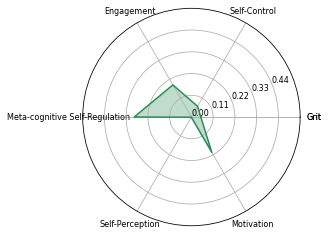

In [58]:
Learners['Persona3'] += Learners['Persona3'][:1]

plt.polar(angles0, Learners['Persona3'], 'seagreen')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles0, Learners['Persona3'], 'seagreen', alpha=0.3)
plt.xticks(angles0, categories)
axes = plt.gca()
axes.set_ylim(0,0.55)
axes.set_yticks(np.arange(0,0.55,0.11))

plt.show()

In [59]:
# Rearrange the columns' order according to factor analyisi

columnsTitles = ['PC1', 'PC2', 'cluster',
                 'G1', 'G2', 'G3', 'G4', 'G6', 'G7', 'G8', 'SC1', 'SC4', 'SC6', 'SC7', 'E1', 'E2', 'SP1', 'M1', 'M2', 'M4', 
                 'SC2', 'SC5', 'MSR1', 'M9', 
                 'G5', 'G11', 'E3', 'SP4', 'M3', 'M5', 
                 'G10', 'SC3', 'E4', 'MSR2', 'SP2', 'M8', 
                 'E5', 'E6', 'M6', 'M7', 
                 'G9', 'G12', 'SP3']

arrange_df_Data_Point_scaled_noNaN = df_Data_Point_scaled_noNaN.reindex(columns=columnsTitles)

In [60]:
arrange_cluster_1 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 0]
arrange_cluster_2 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 1]
arrange_cluster_3 = arrange_df_Data_Point_scaled_noNaN.loc[arrange_df_Data_Point_scaled_noNaN['cluster'] == 2]

In [62]:
mean_arrange_cluster_1 = arrange_cluster_1.mean() 
mean_arrange_cluster_2 = arrange_cluster_2.mean() 
mean_arrange_cluster_3 = arrange_cluster_3.mean() 

list_mean_arrange_cluster_1 = mean_arrange_cluster_1.tolist() 
list_mean_arrange_cluster_2 = mean_arrange_cluster_2.tolist() 
list_mean_arrange_cluster_3 = mean_arrange_cluster_3.tolist()

G_arrange = []
SC_arrange = []
E_arrange = []
MSR_arrange = []
SP_arrange = []
M_arrange = []

for i in range(3):
    ABC1 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC1 = ABC1[3:20]
    G_arrange.append(statistics.mean(ABC1))
    ABC2 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC2 = ABC2[20:24]
    SC_arrange.append(statistics.mean(ABC2))
    ABC3 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC3 = ABC3[24:30]
    E_arrange.append(statistics.mean(ABC3))
    ABC4 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC4 = ABC4[30:36]
    MSR_arrange.append(statistics.mean(ABC4))
    ABC5 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC5 = ABC5[36:40]
    SP_arrange.append(statistics.mean(ABC5))
    ABC6 = eval('list_mean_arrange_cluster_'+str(i+1))
    ABC6 = ABC6[40:]
    M_arrange.append(statistics.mean(ABC6))

print(G_arrange)
print(SC_arrange)
print(E_arrange)
print(MSR_arrange)
print(SP_arrange)
print(M_arrange)

[0.07821356423135267, 0.07322500310581662, 0.07359491831612484]
[0.26137217842801386, 0.25751923350062367, 0.14422483001956368]
[0.04573245055312901, 0.04290426510429588, 0.04273567786959375]
[0.029060175576595987, 0.1924854827359872, 0.11412090154014944]
[0.7027541613316264, 0.687221166892809, 0.430073055028463]
[0.030291354143802435, 0.028482379142958654, 0.028882542854087194]


In [63]:
Learners_arrange = {}
for i in range(3):
    Learners_arrange['Persona_arrange'+str(i+1)] = [G_arrange[i], SC_arrange[i], E_arrange[i], MSR_arrange[i], SP_arrange[i], M_arrange[i]]

Learners_arrange

{'Persona_arrange1': [0.07821356423135267,
  0.26137217842801386,
  0.04573245055312901,
  0.029060175576595987,
  0.7027541613316264,
  0.030291354143802435],
 'Persona_arrange2': [0.07322500310581662,
  0.25751923350062367,
  0.04290426510429588,
  0.1924854827359872,
  0.687221166892809,
  0.028482379142958654],
 'Persona_arrange3': [0.07359491831612484,
  0.14422483001956368,
  0.04273567786959375,
  0.11412090154014944,
  0.430073055028463,
  0.028882542854087194]}

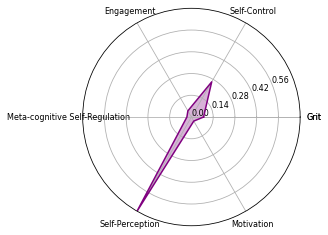

In [64]:
from math import pi
%matplotlib inline 

categories = ['Grit', 'Self-Control', 'Engagement', 'Meta-cognitive Self-Regulation', 'Self-Perception', 'Motivation']
N = len(categories)

angles1 = [n / float(N)*2*pi for n in range(N)]


Learners_arrange['Persona_arrange1'] += Learners_arrange['Persona_arrange1'][:1]
angles1 += angles1[:1]
categories += categories[:1]

plt.polar(angles1, Learners_arrange['Persona_arrange1'], 'purple')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange1'], 'purple', alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.7)
axes.set_yticks(np.arange(0,0.7,0.14))


plt.show()

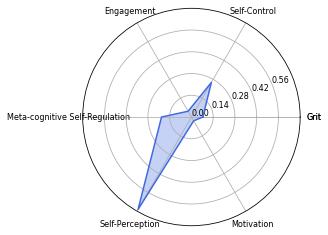

In [65]:
Learners_arrange['Persona_arrange2'] += Learners_arrange['Persona_arrange2'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange2'], 'royalblue')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange2'], 'royalblue', alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.7)
axes.set_yticks(np.arange(0,0.7,0.14))


plt.show()

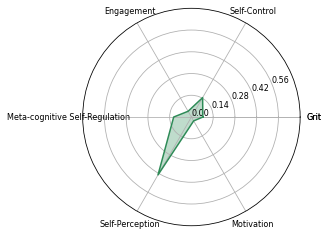

In [66]:
Learners_arrange['Persona_arrange3'] += Learners_arrange['Persona_arrange3'][:1]

plt.polar(angles1, Learners_arrange['Persona_arrange3'], 'seagreen')
# color the area inside
plt.tick_params(labelsize=8)
plt.fill(angles1, Learners_arrange['Persona_arrange3'], 'seagreen', alpha=0.3)
plt.xticks(angles1, categories)
axes = plt.gca()
axes.set_ylim(0,0.7)
axes.set_yticks(np.arange(0,0.7,0.14))


plt.show()

In [ ]:
df_Data_Point_scaled_noNaN.shape